In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into python environment and  Make ‘PassengerId’ as the index column

In [2]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Fill in all the missing values present in all the columns in the dataset

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There is missing values in age, cabin and Embarked.

We can fill missing values of Age column with age of respective genders

In [8]:
data[data['Sex']=='male']['Age'].median()

29.0

In [9]:
data[data['Sex']=='female']['Age'].median()

27.0

In [10]:
data.loc[(data['Age'].isna()) & (data['Sex'] == 'male'), 'Age'] = data[data['Sex'] == 'male']['Age'].median()
data.loc[(data['Age'].isna()) & (data['Sex'] == 'female'), 'Age'] = data[data['Sex'] == 'female']['Age'].median()

In [11]:
data['Age'].isna().sum()

0

We can fill the missing values in Embarked column using its mode.

In [12]:
data['Embarked'].mode()

0    S
dtype: object

In [13]:
data['Embarked'].fillna('S',inplace=True)

In [14]:
data['Embarked'].isna().sum()

0

Out of 891 values of Cabin,687 is missing. So It isn't ideal to fill it because we don't get accurate results by filling this much amount of missing values out of total.Since the values are not enough for doing an analysis, It is better to drop it.

In [15]:
data.drop('Cabin',inplace=True,axis=1)

In [16]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of Survived')

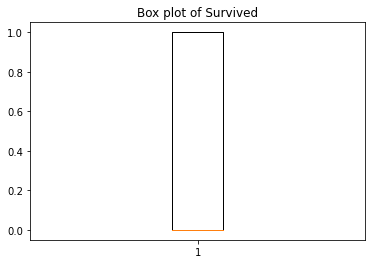

In [17]:
plt.boxplot(data['Survived'])
plt.title('Box plot of Survived')

Text(0.5, 1.0, 'Box plot of Pclass')

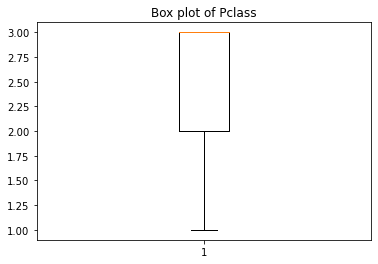

In [18]:
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

Text(0.5, 1.0, 'Box plot of SibSp')

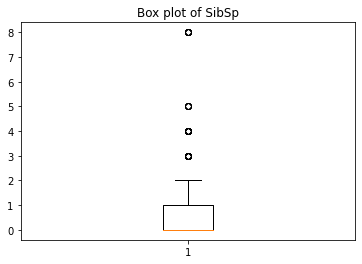

In [19]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

There is outliers in SibSp.Let us check which are them.

In [20]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [21]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [22]:
IQR=Q3-Q1

In [23]:
low_lim_sibsp=Q1-1.5*IQR
up_lim_sibsp=Q3+1.5*IQR

In [24]:
print(low_lim_sibsp)
print(up_lim_sibsp)

-1.5
2.5


In [25]:
outlier=[]
for y in data['SibSp']:
    if((y<low_lim_sibsp) or (y>up_lim_sibsp)):
        outlier.append(y)

In [26]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [27]:
ind1=data['SibSp']>up_lim_sibsp
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [28]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

In [29]:
data.shape

(845, 10)

Text(0.5, 1.0, 'Box plot of SibSp')

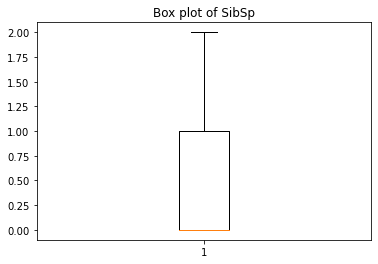

In [30]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

Text(0.5, 1.0, 'Box plot of Fare')

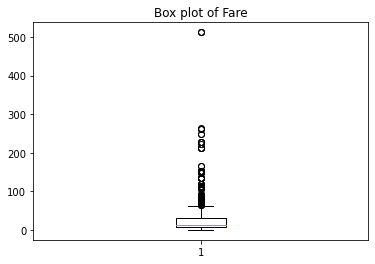

In [31]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [32]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [33]:
print(Q1)

7.8958


In [34]:
print(Q2)
print(Q3)

13.0
30.0


In [35]:
IQR=Q3-Q1

In [36]:
IQR

22.1042

In [37]:
low_lim_fare=Q1-1.5*IQR
up_lim_fare=Q3+1.5*IQR

In [38]:
print(low_lim_fare)
print(up_lim_fare)

-25.2605
63.1563


In [39]:
outlier=[]
for y in data['Fare']:
    if((y<low_lim_fare) or (y>up_lim_fare)):
        outlier.append(y)

In [40]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

These are the outliers in fare column.But there is no need to drop it because each individual travels different distances, so everyones fare will be different according to their travel disatance. 

Text(0.5, 1.0, 'Box plot of Parch')

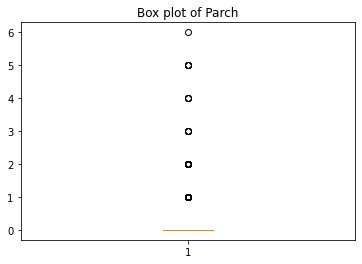

In [41]:
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')

In [42]:
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')

In [43]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [44]:
IQR=Q3-Q1

In [45]:
outlier=[]
for y in data['Parch']:
    if((y<0) or (y>0)):
        outlier.append(y)

In [46]:
outlier

[2,
 1,
 5,
 5,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 2,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 2]

In [47]:
data['Parch'].nunique()

7

There is 7 unique values in Parch.So we doesn't consider these as outliers.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [48]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [49]:
data.Sex.nunique()

2

In [50]:
data1 = pd.get_dummies(data,columns=['Sex'])
data1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


In [51]:
data1.Embarked.nunique()

3

In [52]:
data1 = pd.get_dummies(data1,columns=['Embarked'])
data1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [53]:
y = data1['Survived']
x = data1.drop(['Survived','Name','Ticket'], axis=1)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [55]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

In [56]:
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,predictions))

MSE is : 0.12028360335467342


In [57]:
from sklearn.metrics import r2_score
print('R-squared value is :', r2_score(y_test,predictions))

R-squared value is : 0.4571080917489211


In [58]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,2.279290,30.272391,0.313609,0.317160,31.120305,0.346746,0.653254,0.198817,0.086391,0.714793
std,0.840396,12.624338,0.530909,0.765829,48.973215,0.476216,0.476216,0.399346,0.281106,0.451780
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,2.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


## minmax Scaling

In [59]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [61]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,predictions))

MSE is : 0.12059959998497596


In [63]:
from sklearn.metrics import r2_score
print('R-squared value is :', r2_score(y_test,predictions))

R-squared value is : 0.45568186233076835


There is only a very minute change in MSE and R-squared value after min-max scaling.So min-max scaling doesn't have any effect in this model.